<a href="https://colab.research.google.com/github/vittesha/Titanic_Survival_Prediction_Project/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survival Prediction Project

In [116]:
import pandas as pd
import numpy as np

test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')
test_label_data= pd.read_csv('/content/gender_submission.csv')

In [117]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


#Feature Engineering

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

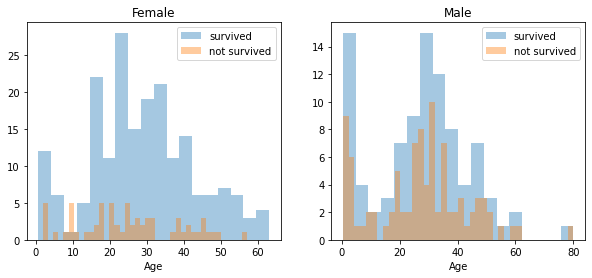

In [122]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women= train[train['Sex']=="female"]
men=train[train['Sex']=="male"]

ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label= not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=40, label= not_survived, ax=axes[1], kde=False)
ax.legend()
_=ax.set_title('Male')

Plotting Embarked vs Survived vs Pclass vs Sex

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


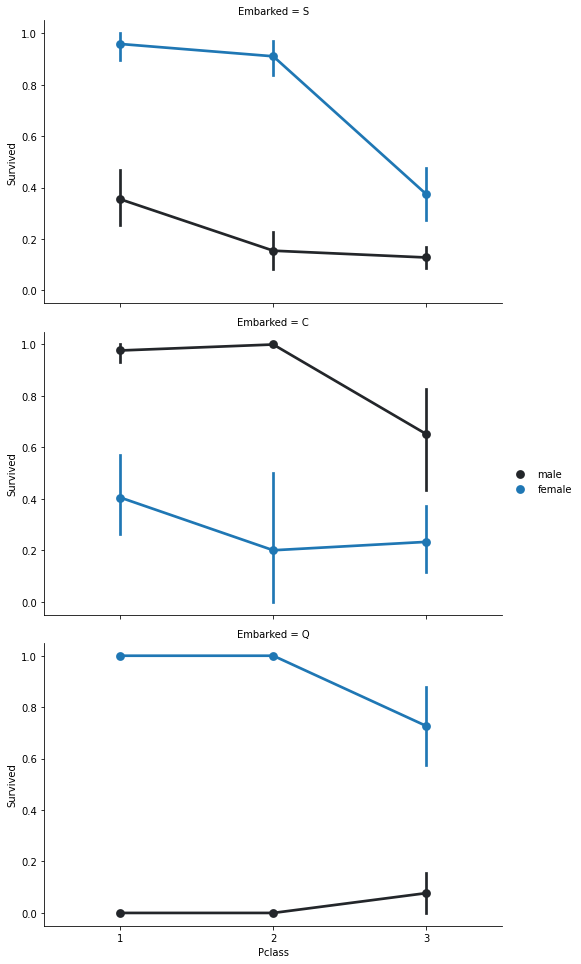

In [123]:
FacetGrid= sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass','Survived','Sex',palette=None, oder=None,hue_order=None)
FacetGrid.add_legend()

Plotting Pclass vs Survived

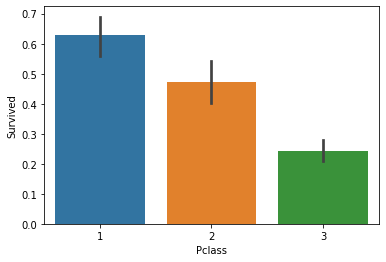

In [124]:
sns.barplot(x='Pclass',y='Survived', data=train)


Plotting Survived vs Pclass vs Age

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


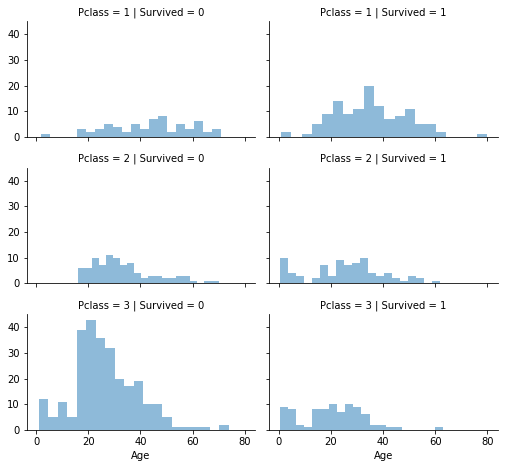

In [125]:
Grid= sns.FacetGrid(train, col='Survived',row='Pclass', size=2.2, aspect=1.6)
Grid.map(plt.hist, 'Age',alpha=.5,bins=20)
Grid.add_legend()

Making a new feature 'Relatives' from sum of SibSp and Parch

In [126]:
data=[train,test]
for dataset in data:
  dataset['relatives']=dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives']>0, 'not_alone']=0
  dataset.loc[dataset['relatives']==0, 'not_alone']=1
  dataset['not_alone']= dataset['not_alone'].astype(int)

In [127]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [128]:
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

Plot of Relatives vs Survived
(to decipher the relationship between the two features)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


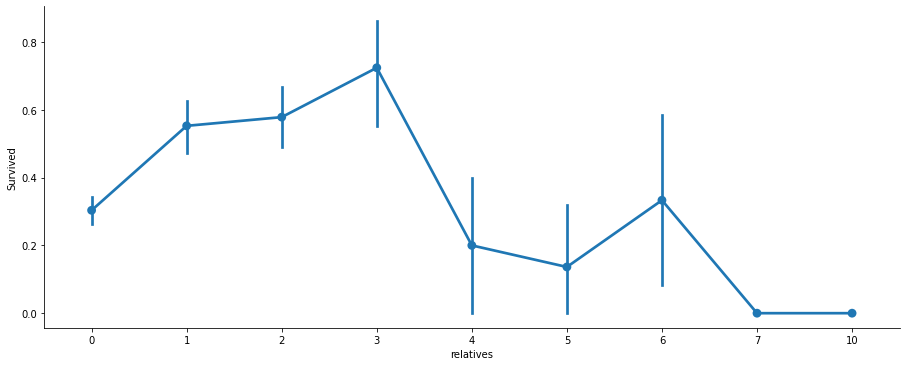

In [129]:
axes=sns.factorplot('relatives','Survived',data=train, aspect=2.5)

Extracting any important/ relevant information from Cabin feature before dropping it

In [130]:
import re
deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
data=[train,test]

for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna("U0")
  dataset['Deck']=dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)
                 

Fixing Age Column

In [131]:
data=[train,test]

for dataset in data:
  mean=train["Age"].mean()
  std=test["Age"].std()
  is_null=dataset["Age"].isnull().sum()
  rand_age=np.random.randint(mean-std, mean+std, size=is_null)
  age_slice=dataset["Age"].copy()
  age_slice[np.isnan(age_slice)]=rand_age
  dataset["Age"]=age_slice
  dataset["Age"]=train["Age"].astype(int)

train["Age"].isnull().sum()

0

Fixing Embarked Column

In [132]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [133]:
common_value='S'
data=[train,test]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].fillna(common_value)

Fare to int

In [134]:
#Converting Fare to int
data=[train,test]

for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

Extracting Titles from Name

In [135]:
data=[train,test]
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
  dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')
  dataset['Title']=dataset['Title'].map(titles)
  dataset['Title']=dataset['Title'].fillna(0)

train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

Sex to Numeric values

In [136]:
genders={'male':0,'female':1}
data=[train,test]

for dataset in data:
  dataset['Sex']=dataset['Sex'].map(genders)

Ticket

In [137]:
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [138]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'], axis=1)

Embarked

In [139]:
ports={"S":0,"C":1,"Q":2}
data=[train,test]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)

Creating Categories from Age

In [140]:
data=[train,test]

for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11, 'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age']=6
  dataset.loc[dataset['Age']>66, 'Age']=7

Creating Categories from Fare

In [141]:
data=[train,test]

for dataset in data:
  dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare']=4
  dataset.loc[dataset['Fare']>250, 'Fare']=5
  dataset['Fare']=dataset['Fare'].astype(int)

Creating new features:
Age Class and Fare Per Person

In [142]:
data=[train,test]

for dataset in data:
  dataset['Age_Class']=dataset['Age']*dataset['Pclass']

In [143]:
for dataset in data:
  dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

In [144]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

#Machine Learning Models

##Logistic Regression

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [149]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person'],
      dtype='object')

In [150]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

In [151]:
train.shape

(891, 15)

In [152]:
test.shape

(418, 14)

In [272]:
independent_var=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person']

train_data= train[independent_var]
train_label=train.Survived
test_data=test[independent_var]

In [281]:
test_label=test_label_data.Survived

In [273]:
sc= StandardScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [276]:
lr= LogisticRegression()

In [277]:
lr_parameters={'C':[0.01,0.1,1,10,100]}
cv_lr=GridSearchCV(lr, lr_parameters, cv=5)
cv_lr.fit(train_data, train_label)
cv_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
def print_results(x):
  print('Best Parameters: {}\n'.format(x.best_params_))
  means=x.cv_results_['mean_test_score']
  stds=x.cv_results_['std_test_score']
  for mean in means:
    print('means: ',round(mean,3))
  for std in stds:
    print('stds: ',round(std*2,3))
  for params in x.cv_results_['params']:
    print('params: ',params)

In [279]:
print_results(cv_lr)

Best Parameters: {'C': 0.1}

means:  0.8
means:  0.814
means:  0.808
means:  0.806
means:  0.806
stds:  0.039
stds:  0.017
stds:  0.022
stds:  0.023
stds:  0.023
params:  {'C': 0.01}
params:  {'C': 0.1}
params:  {'C': 1}
params:  {'C': 10}
params:  {'C': 100}


In [282]:
lr_best_params={'C':[1]}
cv_lr=GridSearchCV(lr, lr_best_params, cv=5)
cv_lr.fit(train_data, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [283]:
lr_predicted_label=cv_lr.predict(test_data)

In [284]:
confusion_matrix= metrics.confusion_matrix(test_label, lr_predicted_label)
confusion_matrix

array([[254,  12],
       [ 26, 126]])

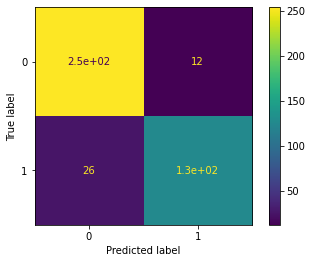

In [285]:
plot_confusion_matrix(cv_lr,test_data,test_label)

In [286]:
acc_lr=metrics.accuracy_score(test_label,lr_predicted_label)
prec_lr=metrics.precision_score(test_label,lr_predicted_label)
recall_lr=metrics.recall_score(test_label,lr_predicted_label)
print("Accuracy: ",acc_lr)
print("Precision: ",prec_lr)
print("Recall: ",recall_lr)

Accuracy:  0.9090909090909091
Precision:  0.9130434782608695
Recall:  0.8289473684210527


In [287]:
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std

In [288]:
train_data, train_label = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [289]:
cv_lr_kfold=KFold(n_splits=10, random_state=1, shuffle=True)

In [291]:
scores_lr = cross_val_score(cv_lr, train_data, train_label, scoring='accuracy')

In [293]:
print('Scores: ',scores_lr)
print('Mean: ',scores_lr.mean())
print('Standard Deviation: ',scores_lr.std())

Scores:  [0.85  0.9   0.81  0.895 0.87 ]
Mean:  0.865
Standard Deviation:  0.032863353450309954


##Support Vector Machine

In [295]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [296]:
svm=SVC()

In [297]:
svm_parameters={ 'C': [0.01,0.1,1,10,100], 'kernel':['rbf','linear']}


In [298]:
cv_svm= GridSearchCV(svm,svm_parameters, cv=5)


In [299]:
test_data=test[independent_var]
independent_var=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person']

train_data= train[independent_var]
train_label=train.Survived
sc= StandardScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [300]:
cv_svm.fit(train_data, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [302]:
print_results(cv_svm)

Best Parameters: {'C': 1, 'kernel': 'rbf'}

means:  0.616
means:  0.791
means:  0.826
means:  0.804
means:  0.832
means:  0.802
means:  0.814
means:  0.804
means:  0.778
means:  0.804
stds:  0.005
stds:  0.036
stds:  0.024
stds:  0.049
stds:  0.034
stds:  0.04
stds:  0.063
stds:  0.045
stds:  0.078
stds:  0.045
params:  {'C': 0.01, 'kernel': 'rbf'}
params:  {'C': 0.01, 'kernel': 'linear'}
params:  {'C': 0.1, 'kernel': 'rbf'}
params:  {'C': 0.1, 'kernel': 'linear'}
params:  {'C': 1, 'kernel': 'rbf'}
params:  {'C': 1, 'kernel': 'linear'}
params:  {'C': 10, 'kernel': 'rbf'}
params:  {'C': 10, 'kernel': 'linear'}
params:  {'C': 100, 'kernel': 'rbf'}
params:  {'C': 100, 'kernel': 'linear'}


In [303]:
svm_Best_Parameters={'C':[1], 'kernel': ['rbf']}
cv_svm=GridSearchCV(svm, svm_Best_Parameters, cv=5)
cv_svm.fit(train_data, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1], 'kernel': ['rbf']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [304]:
svm_predicted_label=cv_svm.predict(test_data)

In [305]:
confusion_matrix_svm= metrics.confusion_matrix(test_label, svm_predicted_label)
confusion_matrix

array([[254,  12],
       [ 26, 126]])

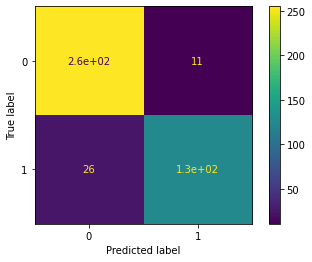

In [306]:
plot_confusion_matrix(cv_svm,test_data,test_label)

In [307]:
print("Accuracy: ",metrics.accuracy_score(test_label,svm_predicted_label))
print("Precision: ",metrics.precision_score(test_label,svm_predicted_label))
print("Recall: ",metrics.recall_score(test_label,svm_predicted_label))

Accuracy:  0.9114832535885168
Precision:  0.9197080291970803
Recall:  0.8289473684210527


In [308]:
train_data, train_label = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [309]:
cv_svm_kfold=KFold(n_splits=10, random_state=1, shuffle=True)

In [310]:
scores_svm = cross_val_score(cv_svm, train_data, train_label, scoring='accuracy')

In [311]:
print('Scores: ',scores_svm)
print('Mean: ',scores_svm.mean())
print('Standard Deviation: ',scores_svm.std())

Scores:  [0.96  0.94  0.915 0.955 0.965]
Mean:  0.9470000000000001
Standard Deviation:  0.018055470085267766


##Random Forest 

In [312]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [313]:
rf_parameters={'n_estimators' : [5,50,350,400],'max_depth' :[2,4,8,16]}

In [314]:
cv_rf=GridSearchCV(rf, rf_parameters, cv=5)

In [315]:
test_data=test[independent_var]
independent_var=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person']

train_data= train[independent_var]
train_label=train.Survived
sc= StandardScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [316]:
cv_rf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [317]:
rf_predicted_label=cv_rf.predict(test_data)

In [318]:
print('Best Parameters: {}\n'.format(cv2.best_params_))

Best Parameters: {'max_depth': 4, 'n_estimators': 50}



In [319]:
rf_Best_Parameters= {'max_depth': [4], 'n_estimators': [50]}

In [320]:
cv_rf=GridSearchCV(rf, rf_Best_Parameters, cv=5)
cv_rf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [321]:
rf_confusion_matrix= metrics.confusion_matrix(test_label, rf_predicted_label)
confusion_matrix

array([[254,  12],
       [ 26, 126]])

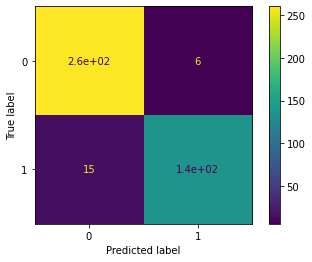

In [322]:
plot_confusion_matrix(cv_rf,test_data,test_label)

In [323]:
print("Accuracy: ",metrics.accuracy_score(test_label,rf_predicted_label))
print("Precision: ",metrics.precision_score(test_label,rf_predicted_label))
print("Recall: ",metrics.recall_score(test_label,rf_predicted_label))

Accuracy:  0.9330143540669856
Precision:  0.9492753623188406
Recall:  0.8618421052631579


In [324]:
train_data, train_label = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [325]:
cv_rf_kfold=KFold(n_splits=10, random_state=1, shuffle=True)

In [326]:
scores_rf = cross_val_score(cv_rf, train_data, train_label, scoring='accuracy')

In [327]:
print('Scores: ',scores_rf)
print('Mean: ',scores_rf.mean())
print('Standard Deviation: ',scores_rf.std())

Scores:  [0.86  0.86  0.82  0.85  0.895]
Mean:  0.857
Standard Deviation:  0.02400000000000002


##K- Nearest Neighbours

In [328]:
from sklearn.neighbors import KNeighborsClassifier

In [329]:
test_data=test[independent_var]
independent_var=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person']

train_data= train[independent_var]
train_label=train.Survived
sc= StandardScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

In [330]:
knn = KNeighborsClassifier(n_neighbors=3)

In [331]:
knn_params={'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
cv_knn= GridSearchCV(knn, knn_params,verbose=1, cv=3,n_jobs=-1)

In [333]:
cv_knn.fit(train_data,train_label)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [334]:
print('Best Parameters: {}\n'.format(cv3.best_params_))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}



In [335]:
knn_Best_Params= {'metric': ['euclidean'], 'n_neighbors': [11], 'weights': ['distance']}
cv_knn= GridSearchCV(knn, knn_Best_Params,verbose=1, cv=3,n_jobs=-1)

In [337]:
cv_knn.fit(train_data,train_label)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [11],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [340]:
knn_predicted_label=cv_knn.predict(test_data)

In [341]:
knn_confusion_matri4= metrics.confusion_matrix(test_label, knn_predicted_label)
confusion_matrix

array([[254,  12],
       [ 26, 126]])

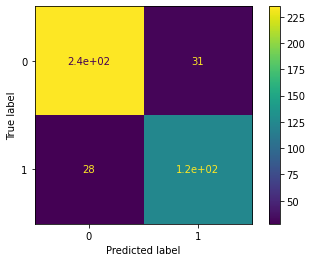

In [342]:
plot_confusion_matrix(cv_knn,test_data,test_label)

In [343]:
print("Accuracy: ",metrics.accuracy_score(test_label,knn_predicted_label))
print("Precision: ",metrics.precision_score(test_label,knn_predicted_label))
print("Recall: ",metrics.recall_score(test_label,knn_predicted_label))

Accuracy:  0.8588516746411483
Precision:  0.8
Recall:  0.8157894736842105


In [344]:
train_data, train_label = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [345]:
cv_knn_kfold=KFold(n_splits=10, random_state=1, shuffle=True)

In [346]:
scores_knn = cross_val_score(cv_knn, train_data, train_label, scoring='accuracy')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [347]:
print('Scores: ',scores_knn)
print('Mean: ',scores_knn.mean())
print('Standard Deviation: ',scores_knn.std())

Scores:  [0.935 0.905 0.89  0.925 0.955]
Mean:  0.922
Standard Deviation:  0.022715633383201084


#Machine Learning Model Evaluation

In [348]:
results= pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine','Random Forest','K Nearest Neighbours'],
    'Score': [scores_lr.mean(),scores_svm.mean(),scores_rf.mean(),scores_knn.mean()]})

In [349]:
result_df= results.sort_values(by='Score', ascending=False)

In [350]:
result_df= result_df.set_index('Score')

In [351]:
result_df

,Model
Score,
0.947,Support Vector Machine
0.922,K Nearest Neighbours
0.865,Logistic Regression
0.857,Random Forest


The best Machine Learning Model for this dataset is **Support Vector Machine**

In [353]:
test_data=test[independent_var]
independent_var=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person']

train_data= train[independent_var]
train_label=train.Survived
sc= StandardScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.fit_transform(test_data)

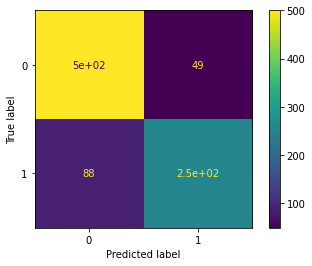

In [354]:
plot_confusion_matrix(cv_svm,train_data,train_label)

In [356]:
from sklearn.metrics import precision_score, recall_score
print('Precision: ',precision_score(test_label,svm_predicted_label))
print('Recall: ',recall_score(test_label,svm_predicted_label))

Precision:  0.9197080291970803
Recall:  0.8289473684210527


In [357]:
from sklearn.metrics import f1_score
f1_score(test_label,svm_predicted_label)

0.8719723183391003